<a href="https://colab.research.google.com/github/joelwwiggins/supply_chain_simulation/blob/main/model_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
%pip install plotly.express
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import plotly as px
from sklearn.preprocessing import  MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [7]:
le = preprocessing.LabelEncoder()
mm=preprocessing.MinMaxScaler()
ss=preprocessing.StandardScaler()
oe=preprocessing.OrdinalEncoder()

In [8]:
def data_input(raw_data):

  #Convert string features into integer labels
  objList = raw_data.select_dtypes(include = "object").columns
  intlist=raw_data.select_dtypes(include = ("int64")).columns
  for feat in objList:
    raw_data[feat] = le.fit_transform(raw_data[feat].astype('str'))
  
  #Scale labels and int data with sklearn standard scaler
  date_merge_scaled=pd.DataFrame(ss.fit_transform(raw_data))

  return date_merge_scaled

In [9]:
def prediction_model(X):
  reconstructed_model = tf.keras.models.load_model("encode_decode_conv1d")
  prediction_result=pd.DataFrame(reconstructed_model.predict(X))
  
  return prediction_result

In [10]:
def production_model(raw_data):
  scaled_results=prediction_model(data_input(raw_data))

  return scaled_results

In [11]:
df=pd.read_csv("input_data.csv")
df

C:\Users\jwiggins\AppData\Local\Temp\ipykernel_5324\691168270.py:1: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("input_data.csv")


,Quantity,Type,Tax Origin,Tax Destination,Origin Location,Order Quantity
1,29891.0,Railcar,(Empty),(Empty),0,0.0
2,30543.0,Railcar,(Empty),(Empty),0,0.0
3,10139.0,Truck,(Empty),SOUTHINGTON CT - THE ALL,0,0.0
4,3213.0,Truck,(Empty),SOUTHINGTON CT - A-1 PRO,0,0.0
5,10035.0,Truck,(Empty),SOUTHINGTON CT - THE ALL,0,0.0
...,...,...,...,...,...,...
181063,0.0,0,0,0,STRASBURG VA - AGP,149.0
181064,0.0,0,0,0,FLAGSTAFF LEUPP RD 1 AZ - AGP,1011.0
181065,0.0,0,0,0,ST PETERS MO - AGP,1413.0
181066,0.0,0,0,0,ROME TN - AGP,4500.0


In [12]:
results=production_model(df)
results

,0,1,2,3,4,5
0,2.064512,0.129662,-0.871582,-0.582954,-1.166240,-0.662742
1,2.110215,0.119341,-0.866919,-0.581138,-1.165758,-0.663410
2,0.592998,0.056769,-1.007141,3.149666,-1.228660,-0.578916
3,0.465338,0.081682,-1.010176,3.140490,-1.231531,-0.578466
4,0.590580,0.057233,-1.007205,3.149652,-1.228714,-0.578905
...,...,...,...,...,...,...
160676,-0.162915,0.607528,1.068297,-0.345183,1.070055,-1.070138
160677,-0.148684,0.529406,-1.005197,-0.388032,-0.953798,-0.311660
160678,-0.165041,0.611031,1.088269,-0.358632,1.084182,-0.987263
160679,-0.148966,0.591498,0.929999,-0.356759,0.903027,-0.681679


In [14]:
input=data_input(df)
input

,0,1,2,3,4,5
0,2.039483,-0.186949,-1.202296,-0.383112,-1.238801,-0.599794
1,2.090539,-0.186949,-1.202296,-0.383112,-1.238801,-0.599794
2,0.492761,0.234527,-1.202296,3.409088,-1.238801,-0.599794
3,-0.049594,0.234527,-1.202296,3.402356,-1.238801,-0.599794
4,0.484617,0.234527,-1.202296,3.409088,-1.238801,-0.599794
...,...,...,...,...,...,...
160676,-0.301195,-1.872853,-1.200496,-0.380869,1.468006,-0.578749
160677,-0.301195,-1.872853,-1.200496,-0.380869,-0.293325,-0.456996
160678,-0.301195,-1.872853,-1.200496,-0.380869,1.443225,-0.400216
160679,-0.301195,-1.872853,-1.200496,-0.380869,1.195419,0.035806


In [16]:
loss=pd.DataFrame(tf.keras.losses.mae(results, input))
loss.columns=["Loss"]

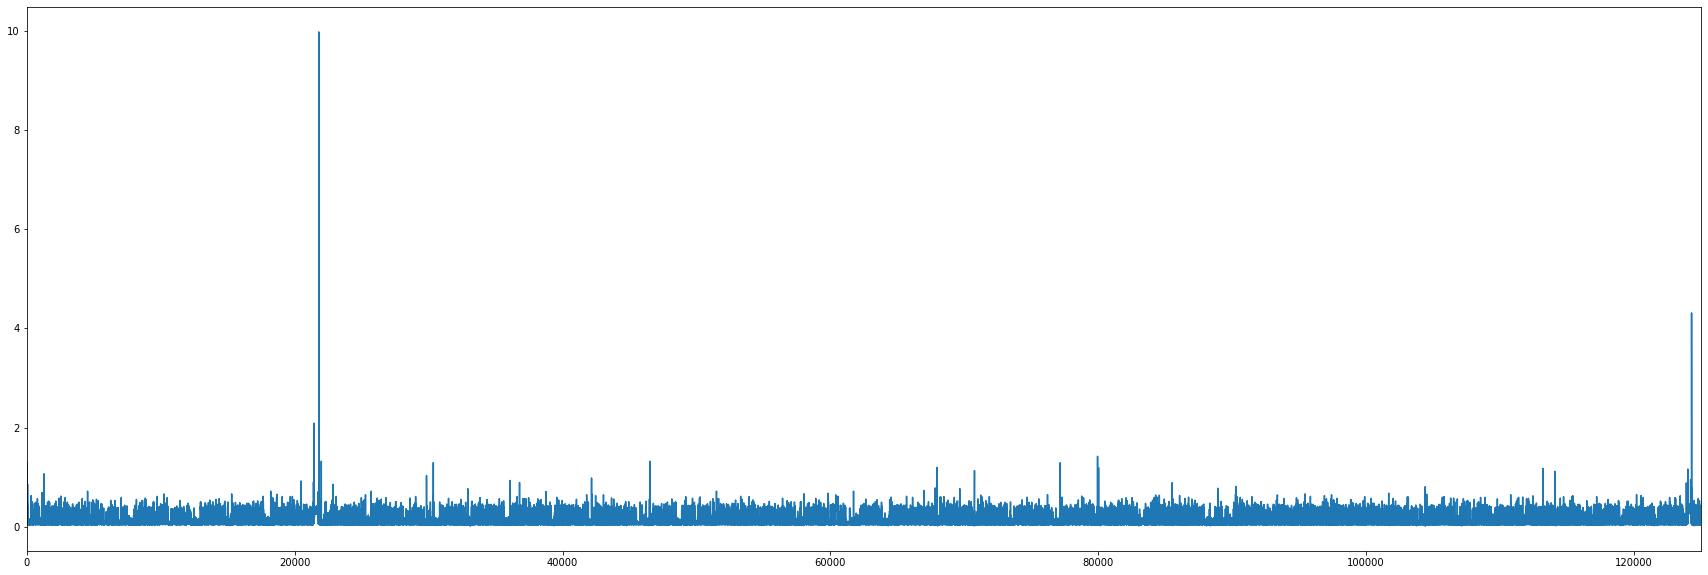

In [27]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(30,10))
plt.xlim(0,125000)
plt.plot(loss)
plt.show()